In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Exploratory Data Analysis

### Categorical Attributes

<Axes: xlabel='Survived', ylabel='count'>

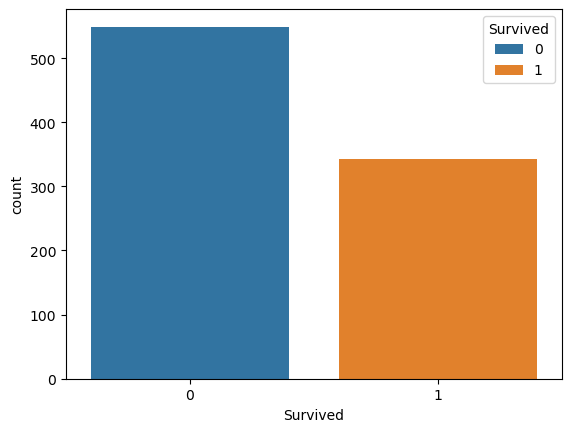

In [7]:
sns.countplot(train,x='Survived',hue='Survived')

<Axes: xlabel='Pclass', ylabel='count'>

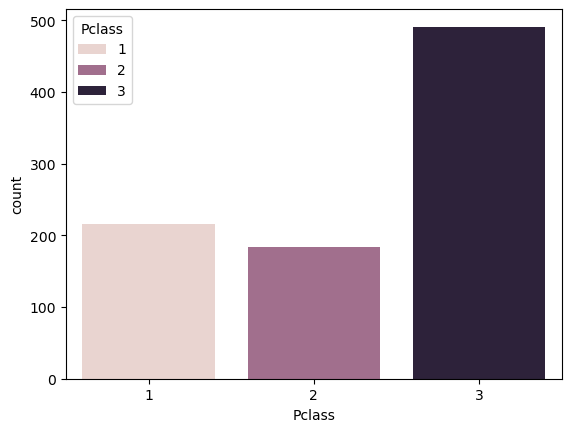

In [8]:
sns.countplot(train,x='Pclass',hue='Pclass')

<Axes: xlabel='Sex', ylabel='count'>

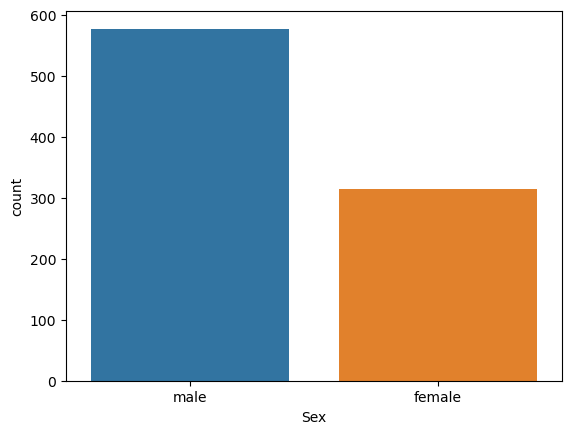

In [9]:
sns.countplot(train,x='Sex',hue='Sex')

<Axes: xlabel='SibSp', ylabel='count'>

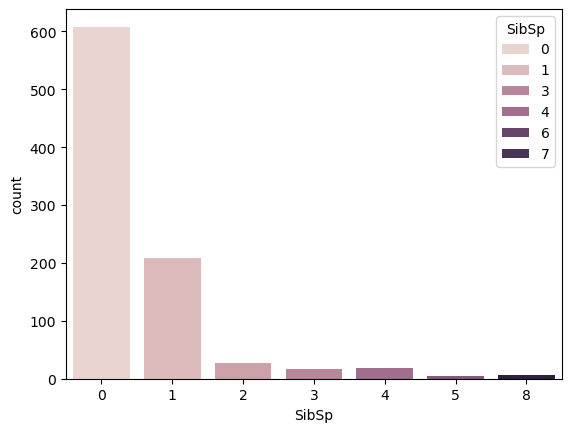

In [10]:
sns.countplot(train,x='SibSp',hue='SibSp')

<Axes: xlabel='Parch', ylabel='count'>

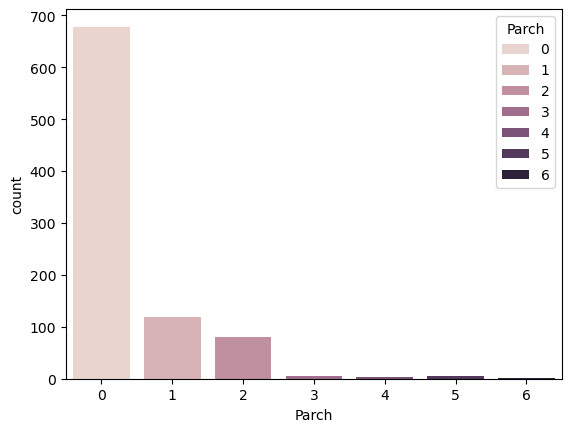

In [11]:
sns.countplot(train,x='Parch',hue='Parch')

<Axes: xlabel='Embarked', ylabel='count'>

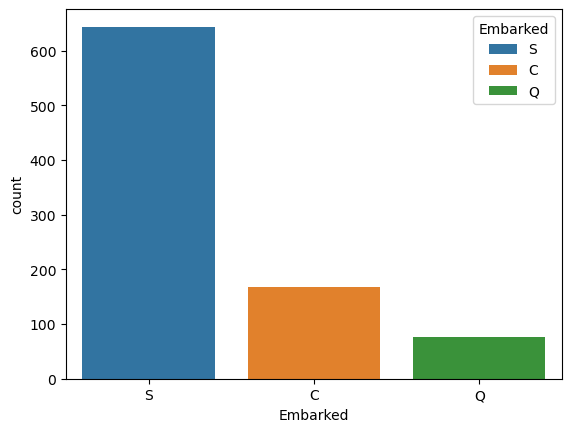

In [12]:
sns.countplot(train,x='Embarked',hue='Embarked')

### Numerical Attributes

<Axes: xlabel='Age', ylabel='Density'>

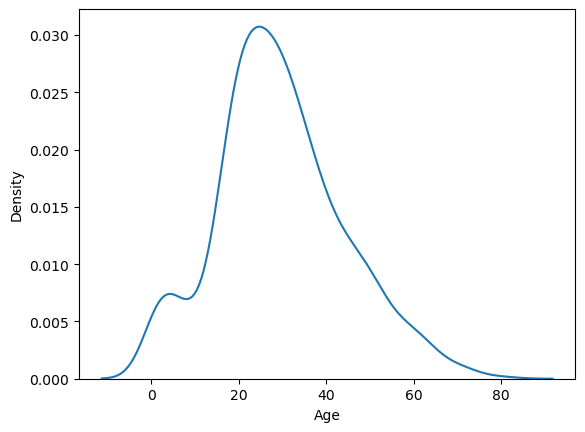

In [13]:
sns.kdeplot(train.Age)

<Axes: xlabel='Fare', ylabel='Density'>

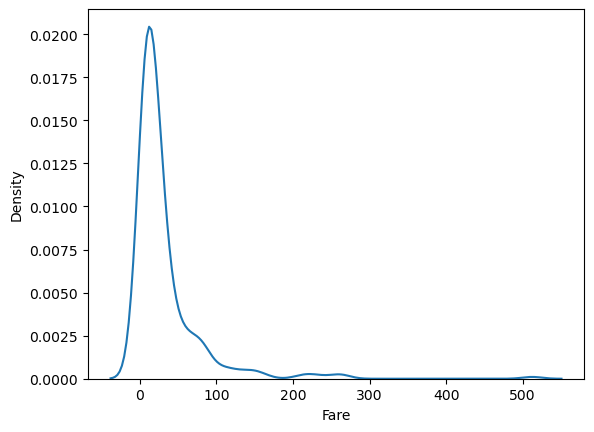

In [14]:
sns.kdeplot(train.Fare)

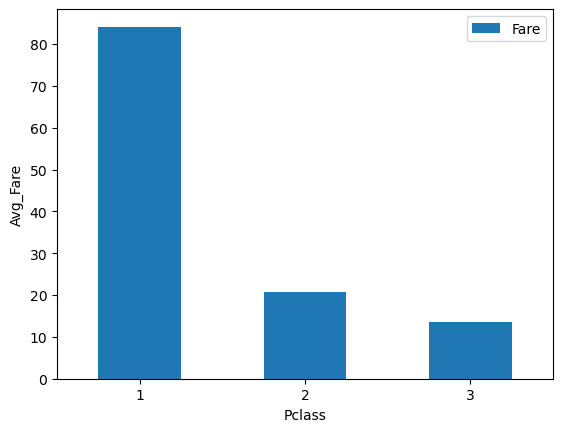

In [15]:
class_fare = train.pivot_table(index='Pclass',values='Fare')
class_fare.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Avg_Fare')
plt.xticks(rotation=0)
plt.show()

C:\Users\kpaps\AppData\Local\Temp\ipykernel_7616\2220960383.py:1: FutureWarning: The provided callable <function sum at 0x0000021DC584BCE0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  class_fare = train.pivot_table(index='Pclass',values='Fare',aggfunc=np.sum)


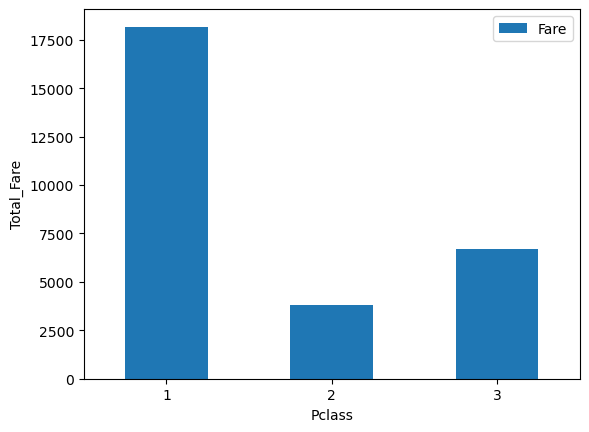

In [16]:
class_fare = train.pivot_table(index='Pclass',values='Fare',aggfunc=np.sum)
class_fare.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Total_Fare')
plt.xticks(rotation=0)
plt.show()

<Axes: xlabel='Pclass', ylabel='Fare'>

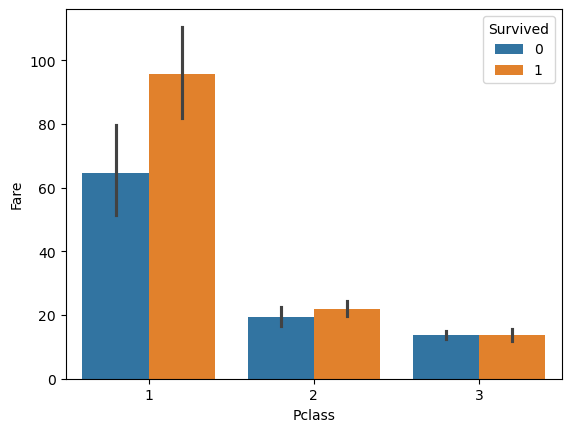

In [48]:
sns.barplot(data=train, x='Pclass',y='Fare',hue='Survived')

<Axes: xlabel='Survived', ylabel='Fare'>

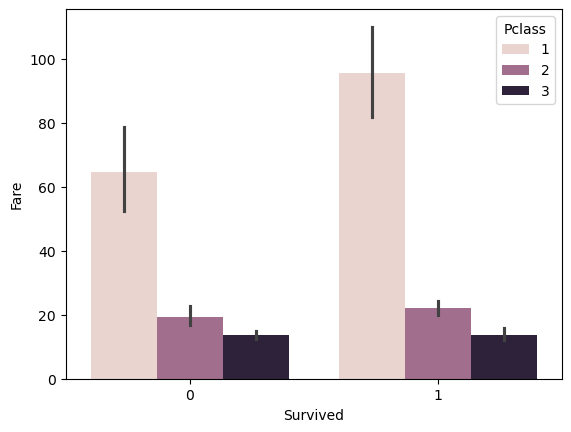

In [49]:
sns.barplot(data=train, x='Survived',y='Fare',hue='Pclass')

## Preprocessing

In [17]:
train_len = len(train)
train_len

891

In [35]:
data = pd.concat([train,test],axis=0)
data = data.reset_index(drop=True)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [37]:
len(data)

1309

In [38]:
data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [39]:
# Drop the column
data = data.drop('Cabin',axis=1)

In [40]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S


In [41]:
data['Age'] = data['Age'].fillna(data['Age'].mean())
data['Fare'] = data['Fare'].fillna(data['Fare'].mean())

In [42]:
data['Embarked'] =  data['Embarked'].fillna(data['Embarked'].mode()[0])

In [43]:
data.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

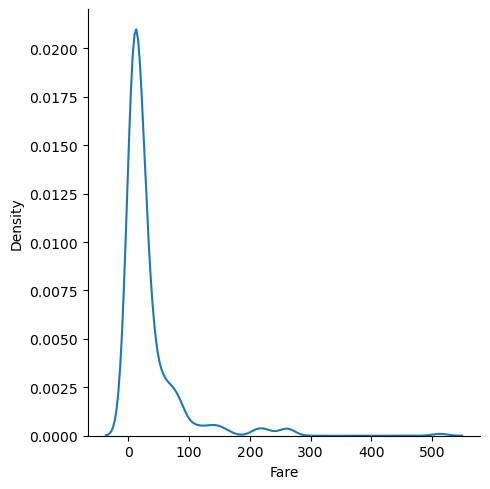

In [44]:
# log transfermation

sns.displot(data['Fare'],kind='kde')

In [45]:
data['Fare'] = np.log(data['Fare']+1)

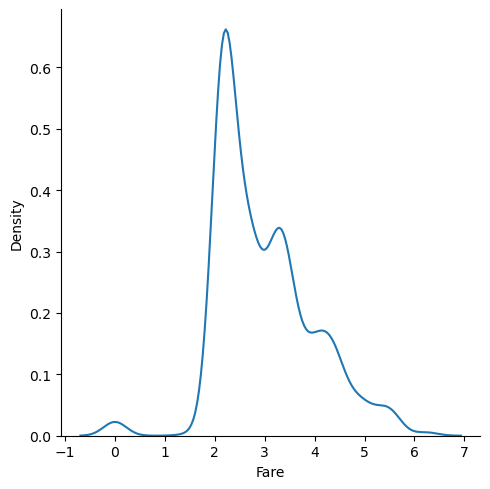

In [46]:
sns.displot(data['Fare'],kind='kde')

### Correlation matrix

<Axes: >

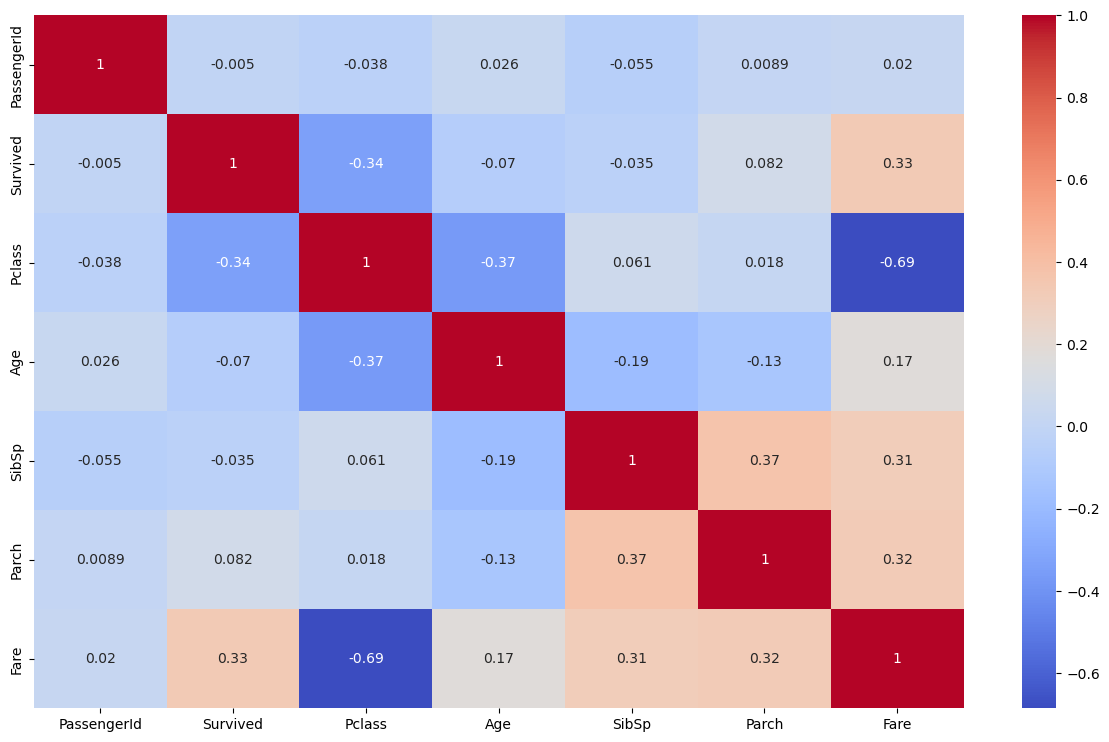

In [47]:
corr = data.corr(numeric_only=True)
plt.figure(figsize = (15,9))
sns.heatmap(corr,annot=True,cmap='coolwarm')

In [52]:
data.Survived.value_counts()

Survived
0.0    549
1.0    342
Name: count, dtype: int64

In [53]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [54]:
# Drop unnecessary columns

data = data.drop(columns = ['Name','Ticket',],axis=1)

In [55]:
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,male,22.000000,1,0,2.110213,S
1,2,1.0,1,female,38.000000,1,0,4.280593,C
2,3,1.0,3,female,26.000000,0,0,2.188856,S
3,4,1.0,1,female,35.000000,1,0,3.990834,S
4,5,0.0,3,male,35.000000,0,0,2.202765,S
...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,male,29.881138,0,0,2.202765,S
1305,1306,NaN,1,female,39.000000,0,0,4.699571,C
1306,1307,NaN,3,male,38.500000,0,0,2.110213,S
1307,1308,NaN,3,male,29.881138,0,0,2.202765,S


## Label Encoding

In [78]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
cols = ['Sex','Embarked','Survived']

for col in cols:
    data[col] = le.fit_transform(data[col])

In [79]:
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.000000,1,0,2.110213,2
1,2,1,1,0,38.000000,1,0,4.280593,0
2,3,1,3,0,26.000000,0,0,2.188856,2
3,4,1,1,0,35.000000,1,0,3.990834,2
4,5,0,3,1,35.000000,0,0,2.202765,2
...,...,...,...,...,...,...,...,...,...
1304,1305,2,3,1,29.881138,0,0,2.202765,2
1305,1306,2,1,0,39.000000,0,0,4.699571,0
1306,1307,2,3,1,38.500000,0,0,2.110213,2
1307,1308,2,3,1,29.881138,0,0,2.202765,2


## Train test split

In [80]:
train = data.iloc[:train_len,:]
test = data.iloc[train_len:,:]

In [85]:
X = train.drop(columns = ['PassengerId','Survived'],axis=1)
Y = train['Survived']

In [86]:
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

## Model Training

In [87]:
from sklearn.model_selection import train_test_split,cross_val_score

def classify(model):
    x_train, y_train, x_test, y_test = train_test_split(X,Y,test_size=0.25,random_state=42)
    model.fit(x_train,y_train)
    print('Accuracy: ' ,model.score(x_test,y_test))
    
    score =  cross_val_score(model,X,Y)
    print('cv_score: ',np.mean(score))

In [88]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model)

ValueError: y should be a 1d array, got an array of shape (223, 7) instead.

In [89]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model)

ValueError: Unknown label type: 'continuous-multioutput'